## Gap Analysis Part 2 - AVL Data Record Count for Every Month

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns; sns.set()

In [3]:
# Load the everyday record count data from spark analysis. 
gap_count = pd.read_csv('count.csv')

In [4]:
# Show the information that can get from the dataset.
gap_count.head()

,Busline,Date,Count
0,Q114,12/31/14,251
1,S57,12/31/14,3
2,B36,12/31/14,227
3,B4,12/31/14,434
4,M22,12/31/14,179


In [5]:
# As the date type is string, the first step is to change it into timestamp.
time = gap_count['Date']
time = map(lambda x:x[:-2] + '20' + x[-2:],time)#x = x[:-2] + '20' + x[-2:]
# date = map(lambda x:datetime.strptime(x, '%m/%d/%Y',time))
gap_count['Date'] = time
print gap_count.head()

  Busline        Date  Count
0    Q114  12/31/2014    251
1     S57  12/31/2014      3
2     B36  12/31/2014    227
3      B4  12/31/2014    434
4     M22  12/31/2014    179


In [6]:
gap_count['Date_new'] = map(lambda x: datetime.strptime(x, '%m/%d/%Y'), gap_count['Date'])
print gap_count.head()
# Now get a new column called "Date_new".

  Busline        Date  Count   Date_new
0    Q114  12/31/2014    251 2014-12-31
1     S57  12/31/2014      3 2014-12-31
2     B36  12/31/2014    227 2014-12-31
3      B4  12/31/2014    434 2014-12-31
4     M22  12/31/2014    179 2014-12-31


In [7]:
# Count the total number of record for every day.
count_date = gap_count.groupby('Date_new').sum()

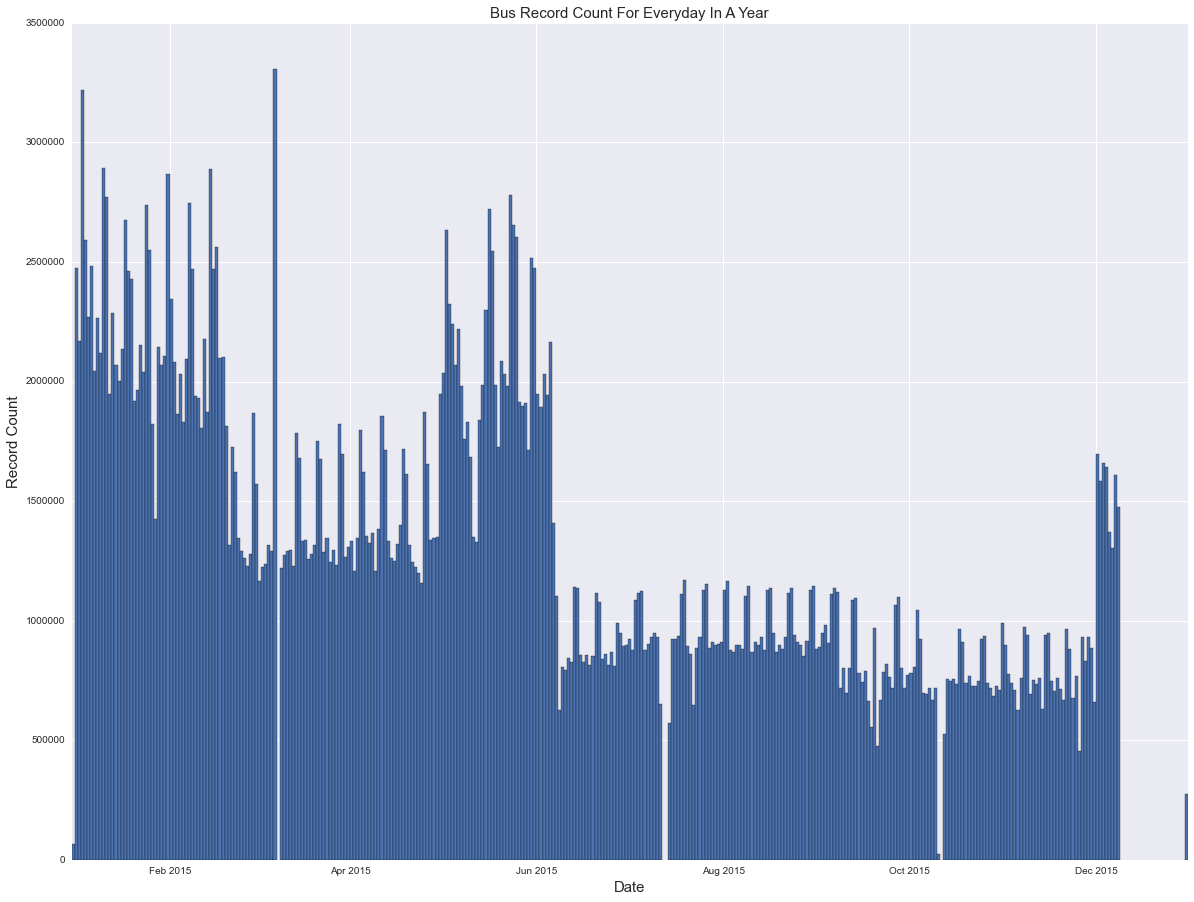

In [8]:
# Plot the whole year data. Show the trend and regularity.
ctdate = count_date.index
ctbus  = count_date.Count

#ctdate0 = map(lambda x: datetime.strptime(x, "-%d-%m-%Y").date(), ctdate)

fig = plt.figure(figsize=(20,15))
ax = plt.subplot(111)
ax.bar(ctdate, ctbus, width=1)
ax.xaxis_date()
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Record Count', fontsize = 15)
ax.set_title('Bus Record Count For Everyday In A Year', fontsize =15)

plt.savefig('count_date.png')

### From this plot, we can find the regularity that Saturday and Sunday have higher records. And there is a obvious change in June.

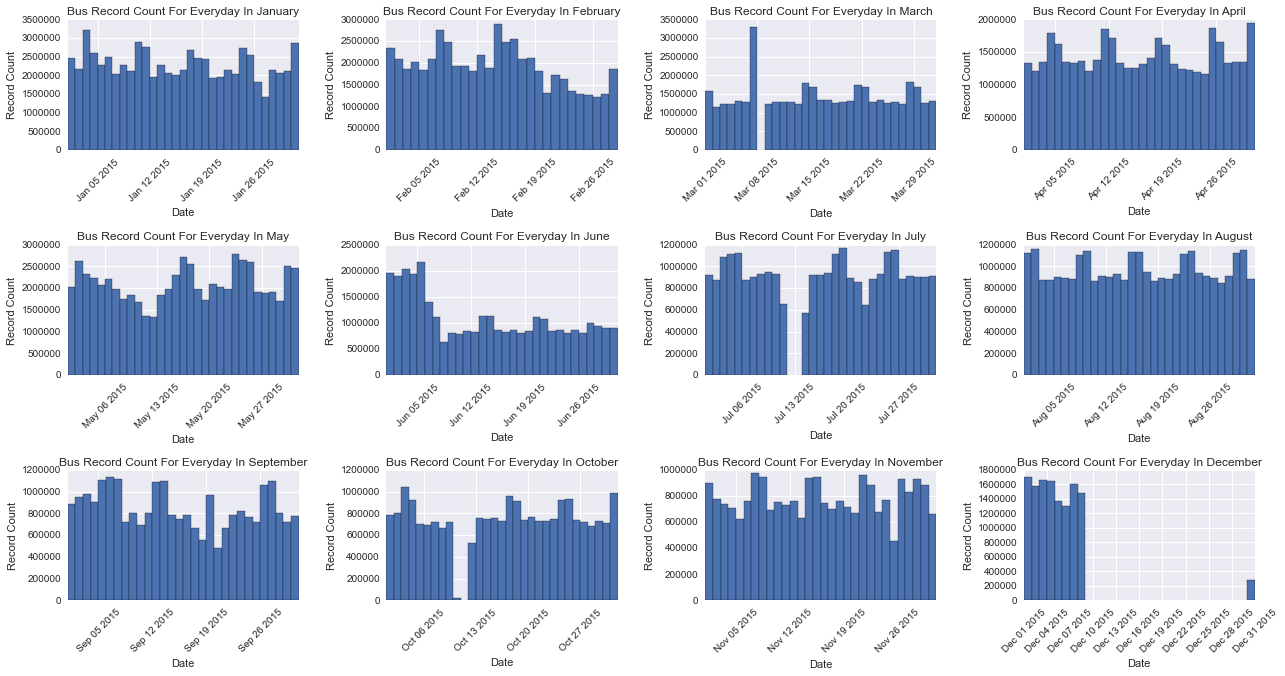

In [9]:
# Here plot the data for every month.
ctmonth = map(lambda x: x.month, ctdate)
count_date2 = count_date.copy()
count_date2['month'] = ctmonth
count_date2 = count_date2.iloc[1:]
monthlist = ['January','February','March','April','May','June','July','August','September','October','November','December']

fig = plt.figure(figsize=(18,18))
for i in range(1,13):
    count_tmp = count_date2[count_date2['month'] == i]
    #fig = plt.figure(figsize=(12,8))
    ctdatetmp = count_tmp.index
    ctbustmp  = count_tmp.Count
    
    
    ax = fig.add_subplot(6,4,i)
    ax.bar(ctdatetmp, ctbustmp, width=1)
    ax.xaxis_date()
    plt.setp(plt.gca().get_xticklabels(),rotation=45) 
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Record Count')
    ax.set_title('Bus Record Count For Everyday In '+monthlist[i-1])

fig.tight_layout()

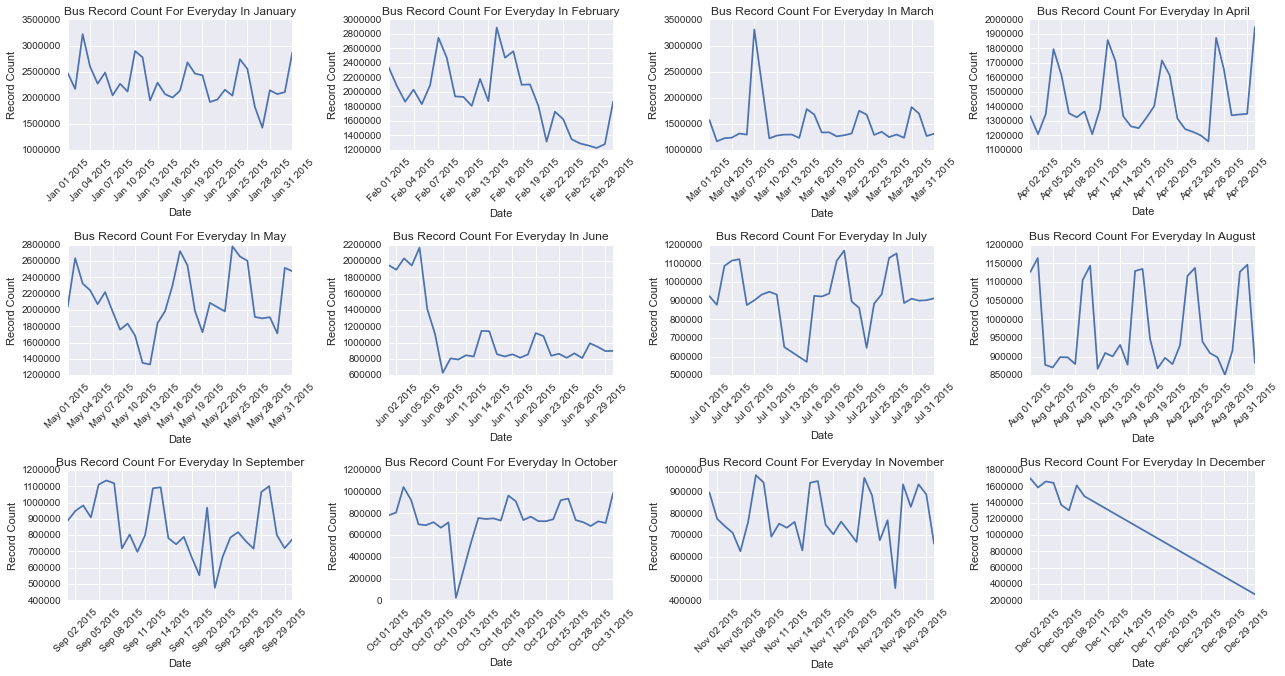

In [10]:
ctmonth = map(lambda x: x.month, ctdate)
count_date3 = count_date.copy()
count_date3['month'] = ctmonth
count_date3 = count_date3.iloc[1:]
monthlist = ['January','February','March','April','May','June','July','August','September','October','November','December']

fig = plt.figure(figsize=(18,18))
for i in range(1,13):
    count_tmp = count_date3[count_date3['month'] == i]
    #fig = plt.figure(figsize=(12,8))
    ctdatetmp = count_tmp.index
    ctbustmp  = count_tmp.Count
    
    
    ax = fig.add_subplot(6,4,i)
    ax.plot(ctdatetmp, ctbustmp)
    ax.xaxis_date()
    plt.setp(plt.gca().get_xticklabels(),rotation=45) 
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Record Count')
    ax.set_title('Bus Record Count For Everyday In '+ monthlist[i-1])

fig.tight_layout()

In [14]:
# Here we get the average of every month record.
ctmonth = map(lambda x: x.month, ctdate)
count_date4 = count_date.copy()
count_date4['month'] = ctmonth
count_date4 = count_date4.iloc[1:]
monthlist = ['January','February','March','April','May','June','July','August','September','October','November','December']

for i in range(1,13):
    count_tmp = count_date3[count_date3['month'] == i]
    ctdatetmp = count_tmp.index
    ctbustmp  = count_tmp.Count
    ctbustmp_mean = np.mean(ctbustmp)
    #print "The average of record count for " + monthlist[i-1] + " is " + str(round(ctbustmp_mean,2))
    print 'The average of record count for {} is {}'.format(monthlist[i-1], str(round(ctbustmp_mean,2)))

The average of record count for January is 2294183.32
The average of record count for February is 1931010.46
The average of record count for March is 1444568.3
The average of record count for April is 1435417.13
The average of record count for May is 2100657.58
The average of record count for June is 1099950.07
The average of record count for July is 931454.21
The average of record count for August is 972815.94
The average of record count for September is 849384.97
The average of record count for October is 753674.73
The average of record count for November is 782580.4
The average of record count for December is 1401806.22
